# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import pandas as pd
import zipfile

from sklearn import metrics
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from scipy.optimize import minimize
from numba import jit
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore", category = RuntimeWarning)



* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [35]:
# Your code here
zf = zipfile.ZipFile('C:/Users/alex_/Documents/IRONHACK/supervised-classification/your-code/data_all.zip') # having First.csv zipped file.
df = pd.read_csv(zf.open('data_all.csv'), nrows = 40000)
print(data.isna().sum())
data.head()

e      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64


,e,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,21.0,37.0,37.0,21.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,50.0,115.0,172.0,215.0,215.0,170.0,78.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,158.0,219.0,241.0,242.0,221.0,217.0,232.0,206.0,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,159.0,245.0,232.0,145.0,114.0,51.0,41.0,146.0,243.0,164.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,95.0,231.0,222.0,123.0,22.0,4.0,0.0,4.0,127.0,250.0,245.0,158.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,77.0,218.0,248.0,139.0,12.0,0.0,0.0,0.0,5.0,129.0,250.0,254.0,215.0,37.0,0.0,0

In [3]:
print(data.info(memory_usage = True))

data_downcast = pd.DataFrame()

for element in data.columns:
    data_downcast[element] = pd.to_numeric(data[element], downcast = "integer")
    
data_downcast.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 239.6 MB
None


e      int8
1      int8
2      int8
3      int8
4      int8
       ... 
780    int8
781    int8
782    int8
783    int8
784    int8
Length: 785, dtype: object

In [4]:
data_downcast.info(memory_usage = "deep")
# data_downcast.e.value_counts()
data_downcast

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 785 entries, e to 784
dtypes: int16(632), int8(153)
memory usage: 54.1 MB


,e,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,21,37,37,21,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,50,115,172,215,215,170,78,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,35,158,219,241,242,221,217,232,206,47,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,159,245,232,145,114,51,41,146,243,164,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,95,231,222,123,22,4,0,4,127,250,245,158,20,0,0,0,0,0,0,0,0,0,0,0,0,0,2,77,218,248,139,12,0,0,0,5,129,250,254,215,37,0,0,0,0,0,0,0,0,0,0,0,0,0,11,139,248,218,77,2,0,0,1,36,177,252,254,215,37,0,0,0,0,0,0,0,0,0,0,0,0,7,91,220,231,95,8,0,0,3,36,163,246,254,252,172,21,0,0,0,0,0,0,0,0,0,0,0,0,34,202,246,159,22,0,0,3,67,174,245,254,254,250,130,5,0,0,0,0,0,0,0,0,0,0,0,3,84,233,220,52,1,0,5,47,168,218,237,254,255,252,172,21,0,0,0,0,0,0,0,0,0,0,0,22,171,249,172,21,0,0,26,156,151,74,191,253,255,254,215,37,0,0,0,0,0,0,0,0,0,0,2,82,232,243,115,4,0,0,5,31,23,85,232

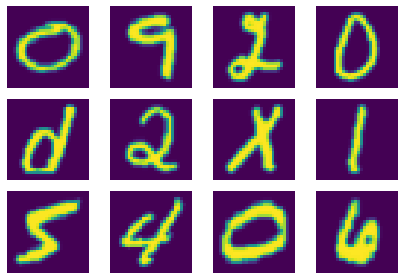

In [5]:

fig, ax = plt.subplots(3,4,sharex=True,sharey=True)
for i in range(4):
    ax[0,i].imshow(data.iloc[np.random.choice(9999), 1:].values.reshape(28,28))
    ax[0,i].axis('off')
    ax[1,i].imshow(data.iloc[np.random.choice(9999), 1:].values.reshape(28,28))
    ax[1,i].axis('off')
    ax[2,i].imshow(data.iloc[np.random.choice(9999), 1:].values.reshape(28,28))
    ax[2,i].axis('off')
plt.tight_layout()


* Try to do the same thing with lowercases.

In [6]:
# Your code here

string.digits
string.ascii_uppercase
string.ascii_lowercase

labels = string.digits + string.ascii_uppercase + string.ascii_lowercase

labels_dict ={k:v for k,v in enumerate(labels)}

labels_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'c',
 39: 'd',
 40: 'e',
 41: 'f',
 42: 'g',
 43: 'h',
 44: 'i',
 45: 'j',
 46: 'k',
 47: 'l',
 48: 'm',
 49: 'n',
 50: 'o',
 51: 'p',
 52: 'q',
 53: 'r',
 54: 's',
 55: 't',
 56: 'u',
 57: 'v',
 58: 'w',
 59: 'x',
 60: 'y',
 61: 'z'}

* Try to do the same thing with numbers.

In [7]:
data_downcast.e.value_counts()

1     2282
7     2142
3     2050
2     2011
9     1994
      ... 
38     138
60     138
51     135
20     129
45     110
Name: e, Length: 62, dtype: int64

In [8]:
X = data_downcast.drop(columns = ["e"])/255
y = data_downcast.e

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [10]:
light_gbm = LGBMClassifier()

light_gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [12]:
y_hat_train = light_gbm.predict(X_train)
y_hat_test =  light_gbm.predict(X_test)

In [30]:
def confusion_matrix(y_trn, y_h_trn, y_tst, y_h_tst,labels,annot=False,fmt='g'):
    
    #confusion matrix
    fig, ax = plt.subplots(1,2, figsize = (25, 25))    
    #creating confusion matrix
    gbm_train = metrics.confusion_matrix(y_trn, y_h_trn)
    gbm_test = metrics.confusion_matrix(y_tst, y_h_tst)
    
    #Normalization
    gbm_train = gbm_train / gbm_train.sum(axis=0)
    gbm_test = gbm_test / gbm_test.sum(axis=0)
    
    sns.heatmap(gbm_train,cbar=False,square=True,annot=annot,cmap='Blues',fmt='g',yticklabels=labels,xticklabels=labels,ax=ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Trained data confusion matrix')
    
    sns.heatmap(gbm_test,cbar=False,square=True,annot=annot,cmap='Blues',fmt=fmt,yticklabels=labels,xticklabels=labels,ax=ax[1])
    ax[1].set_ylabel('True label')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_title('Tested data confusion matrix')
    

    plt.show()

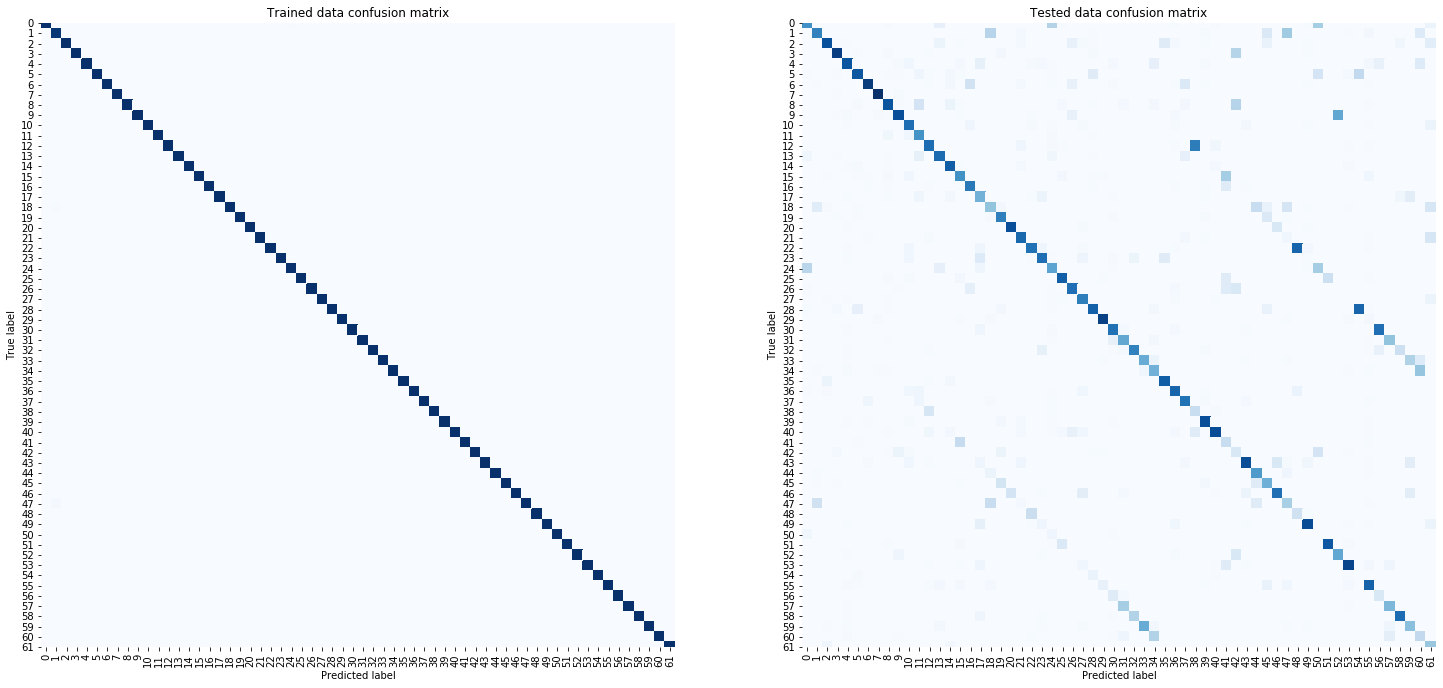

In [31]:
confusion_matrix(y_train,y_hat_train,y_test,y_hat_test,labels_dict);